In [21]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy.random as rnd
from sklearn.preprocessing import StandardScaler

In [22]:
def dataset():
    rnd.seed(4)
    m = 200
    w1, w2 = 0.1, 0.3
    noise = 0.1

    angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * rnd.randn(m)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(data[:100])
    X_test = scaler.transform(data[100:])
    
    return X_train, X_test

### Performing PCA with an Undercomplete Linear Autoencoder

In [9]:
n_inputs = 3 # 3D inputs
n_hidden = 2 # 2D codings
n_outputs = n_inputs

learning_rate = 0.01

In [10]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])

# By not adding any non-linear activations, it can perform PCA.
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

In [14]:
init = tf.global_variables_initializer()

X_train, X_test = dataset()

n_iterations = 1000
codings = hidden

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_test})

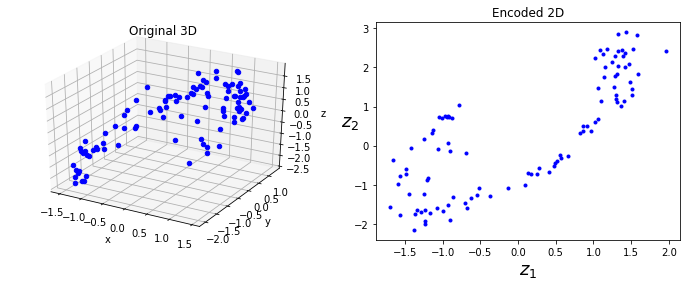

In [44]:
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(121, projection='3d')
for x, y, z in X_train:
    ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Original 3D')

plt.subplot(122)
plt.plot(codings_val[:,0], codings_val[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.title('Encoded 2D')
plt.show()

### Stacked Autoencoders with MNIST

In [ ]:
from functools import partial

n_inputs = 28 * 28 # MNIST img size
n_hidden1 = 300
n_hidden2 = 150 # codings
n_hidden3 = n_hidden1
n_outputs = n_inputs